# Actividad
Redes Neuronal Convolucional aplicadas en MNIST reconocimiento de dígitos manuscritos



---
Por: Ángela Daniela Córdoba Álvarez


---




In [1]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Cargar conjunto de datos
mnist = keras.datasets.mnist

# Cargar la división de entrenamiento y prueba del dataset
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Normalizar los valores de píxeles del tren y probar las imágenes
# Se dividen los valores de píxeles por 255 para escalarlos al rango [0, 1]
training_images = training_images / 255.0
test_images = test_images / 255.0

In [3]:
# Construir el modelo de clasificación
'''
Se define el modelo de clasificación utilizando Sequential (modelo lineal
de capas apiladas) y las capas Conv2D: capa de convolución con 32 filtros
de tamaño (3,3) y activación ReLU; MaxPooling2D: capa de agrupación máxima
con tamaño (2,2); Flatten: capa de aplanamiento que aplana la salida; 2 capas
Dense completamente conectadas con activación ReLU y softmax
'''
model = keras.models.Sequential([
    # Agregar convoluciones y max pooling
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    # Agregar capas densamente conectadas
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Compilar el modelo utilizando optimizador Adam y la pérdida de entropía cruzada categórica dispersa
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 30ms/step - accuracy: 0.9096 - loss: 0.3055
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 25ms/step - accuracy: 0.9838 - loss: 0.0515
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 23ms/step - accuracy: 0.9900 - loss: 0.0326
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9936 - loss: 0.0201
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.9952 - loss: 0.0145
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9974 - loss: 0.0092
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 25ms/step - accuracy: 0.9978 - loss: 0.0067
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9984 - loss: 0.0050
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.9984 - loss: 0.0049
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9983 - loss: 0.0050


<Axes: >

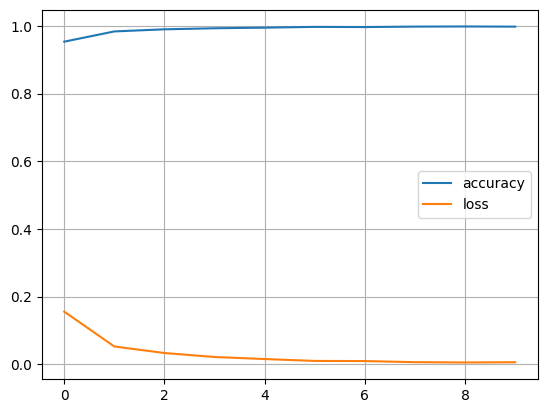

In [5]:
# Entrenar el modelo con los datos de entramiento durante 10 épocas
history = model.fit(training_images, training_labels, epochs=10)

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

In [6]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print(f'Pérdida en el conjunto de entrenamiento: {loss}')
print(f'Precisión en el conjunto de entrenamiento: {accuracy}')

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9984 - loss: 0.0046
Pérdida en el conjunto de entrenamiento: 0.004875978454947472
Precisión en el conjunto de entrenamiento: 0.998199999332428
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9802 - loss: 0.0803
Pérdida en el conjunto de prueba: 0.06013531982898712
Precisión en el conjunto de prueba: 0.9860000014305115


In [7]:
# Predicción en una imagen de prueba específica imprimiendo la etiqueta real y la clasificación prevista
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

Label: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Classification:
 [[8.7403493e-14]
 [7.3723263e-09]
 [1.0000000e+00]
 [1.0589568e-17]
 [3.0095462e-19]
 [2.4077896e-20]
 [6.1229390e-15]
 [9.6971349e-17]
 [3.0873174e-18]
 [3.6934324e-16]]


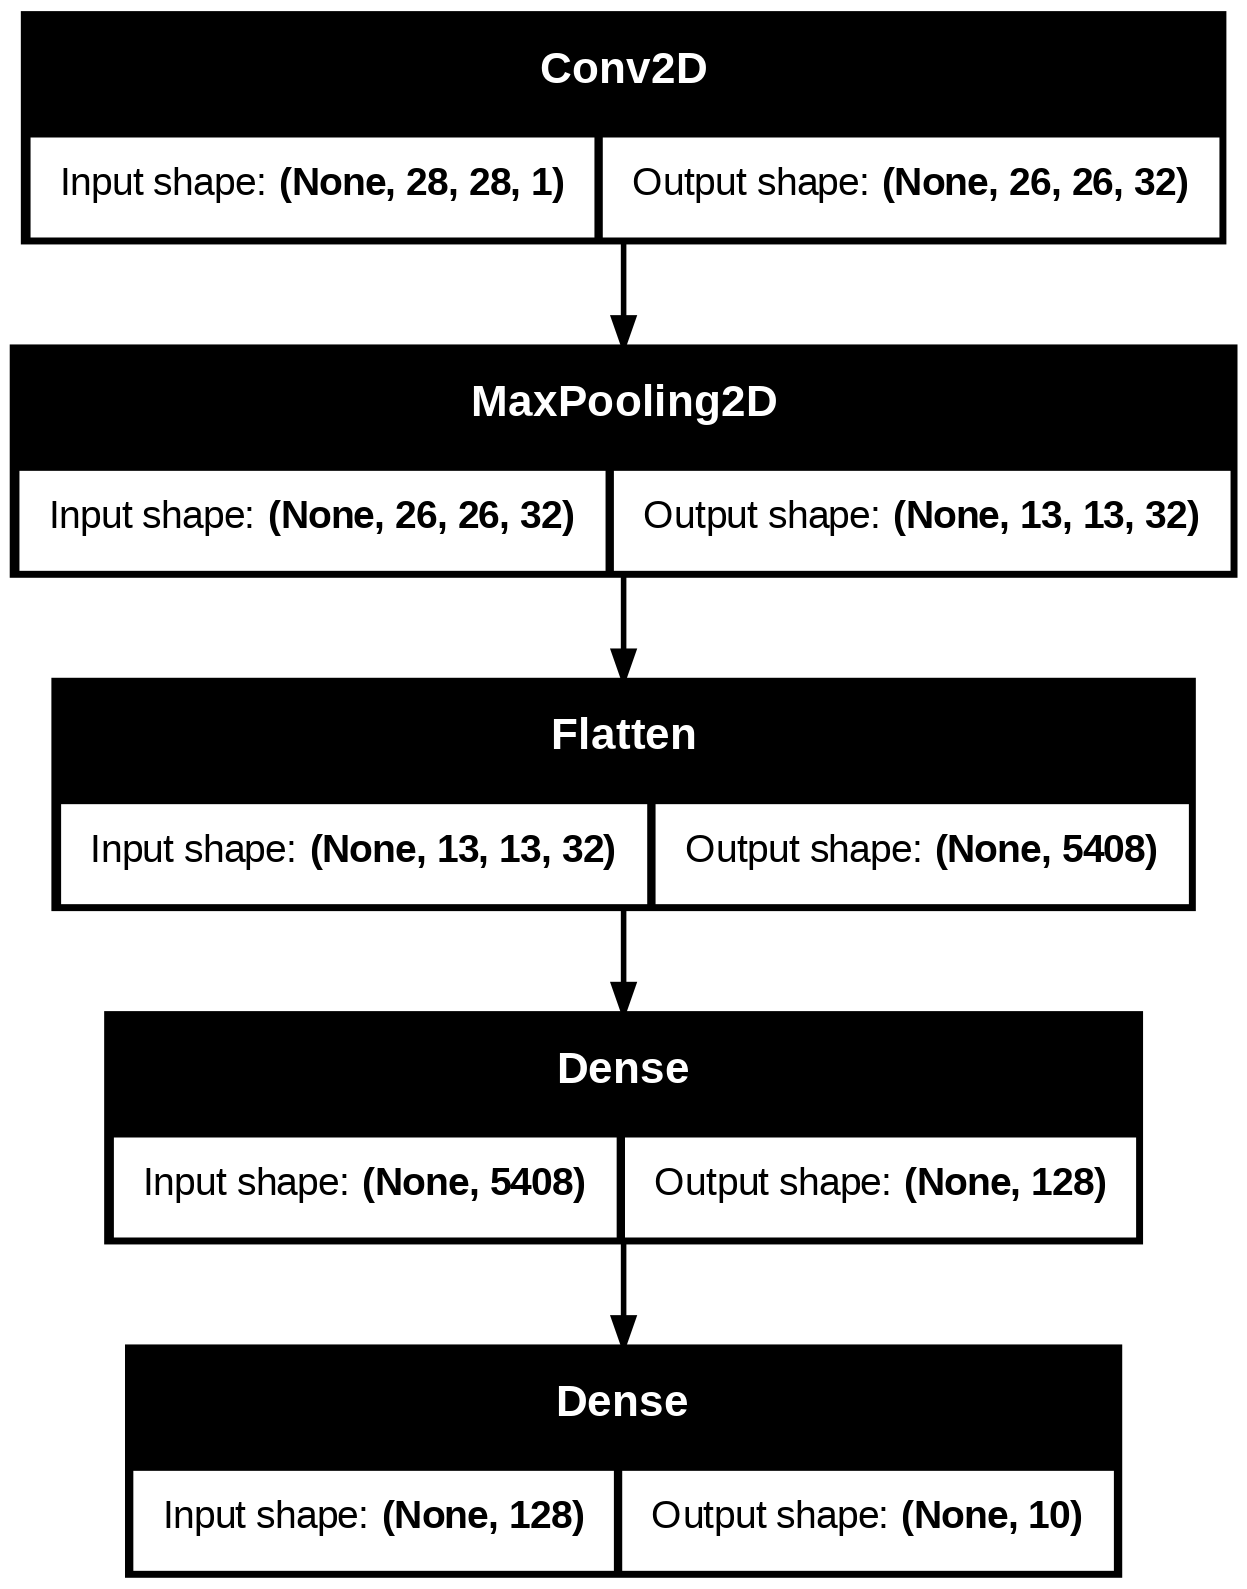

In [8]:
# Mostrar arquitectura de la red
keras.utils.plot_model(model, show_shapes=True)

In [9]:
# Para ver las convoluciones y el agrupamiento:

# Preparar los datos
print(test_labels[:30]) # Entender qué dígitos representan las primeras 30 imágenes

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [10]:
# Selección de imágenes de interés
FIRST_IMAGE = 3
SECOND_IMAGE = 10
THIRD_IMAGE = 25

print(test_labels[FIRST_IMAGE])
print(test_labels[SECOND_IMAGE])
print(test_labels[THIRD_IMAGE])

0
0
0


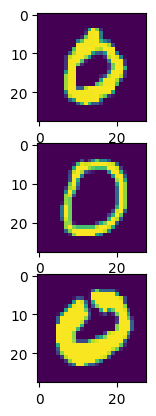

In [11]:
# Visualizar las imágenes
# Crea un arreglo de subtramas (3x1) y muestra las 3 imágenes seleccionadas
f, axarr = plt.subplots(3, 1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

In [ ]:
# Extracción de activaciones

layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

# Visualizar las convoluciones
f, axarr = plt.subplots(3,3)
axarr[0, 0].set_title("Image Input")
axarr[0,0]. imshow(test_images[FIRST_IMAGE])

f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[0, 1].set_title("Layer"+ str(layer) +", Filter1")
axarr[0,1].imshow(f1[0, : , :, filter1])
axarr[0,2].set_title("Layer"+ str(layer) +", Filter2")
axarr[0,2].imshow(f1[0, : , :, filter2])
axarr[1,0].imshow(test_images[SECOND_IMAGE])

f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[1,1].imshow(f2[0, : , :, filter1])
axarr[1,2]. imshow(f2[0, : , :, filter2])
axarr[2,0].imshow(test_images[THIRD_IMAGE])

f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[2,1].imshow(f3[0, : , :, filter1])
axarr[2,2].imshow(f3[0, : , :, filter2])